In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')
sys.path.append('../../ex02/solution')

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [3]:
from ex02.solution.costs import compute_loss, calculate_mse

def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    
    tx_gram = tx.T @ tx  # gram matrix
    b = (tx.T @ y)
    w = np.linalg.solve(tx_gram, b)
    
    loss = compute_loss(y, tx, w)
    
    return loss, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
from ex02.solution.grid_search import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    # grid search
    w0, w1 = generate_w(num_intervals=100)
    losses_on_grid = grid_search(y, tx, w0, w1)
    loss_grid_search, w0, w1 = get_best_parameters(w0, w1, losses_on_grid)
    w_grid_search = (w0, w1)
    
    # least squares
    loss_least_squares, w_least_squares = least_squares(y, tx)
        
    return w_grid_search, w_least_squares

Test it here

In [5]:
w_grid_search, w_least_squares =  test_your_least_squares()

good

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [7]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # **************************************************
    tx = np.ones((x.size, degree+1))
    
    for i in range(degree):
        tx[:,i+1] = np.power(x, i+1)
    
    return tx

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [8]:
from costs import compute_loss
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x, degree)
       
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse, weights = least_squares(y, tx)
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248672


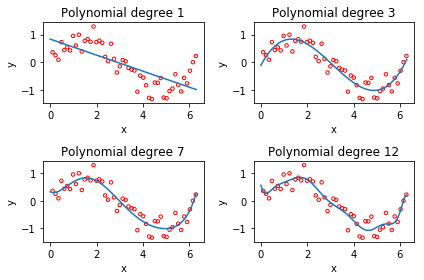

In [9]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [10]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    
    indices = np.random.permutation(x.size)
    train_size = int(np.floor(ratio*x.size))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    
    x_train, y_train = x[train_indices], y[train_indices]
    x_test, y_test = x[test_indices], y[test_indices]  
    
    return x_train, y_train, x_test, y_test
    

Then, test your `split_data` function below.

In [11]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    loss_tr, weights = least_squares(y_tr, tx_tr)
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2 * loss_tr)
    rmse_te = np.sqrt(2 * compute_loss(y_te, tx_te, weights))
    
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [12]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
proportion=0.9, degree=12, Training RMSE=0.248, Testing RMSE=0.219
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
proportion=0.5, degree=12, Training RMSE=0.213, Testing RMSE=0.350
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.335
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.911


# 3 Ridge Regression
Please fill in the function below.

In [13]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    N, M = tx.shape
    w = np.linalg.solve(tx.T @ tx + lambda_*(2*N) * np.identity(M), tx.T @ y)
    
    return w

In [14]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        weights = ridge_regression(y_tr, tx_tr, lambda_)
        
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, tx_tr, weights)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, tx_te, weights)))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.220, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.222, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.225, Testing RMSE=0.322
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.226, Testing RMSE=0.325
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.327
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.229, Testing RMSE=0.327
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.229, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.239, Testing RMSE=0.279
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.259, Testing RMSE=0.266
proportion=0.5, degree=7, lambda=0.193, 

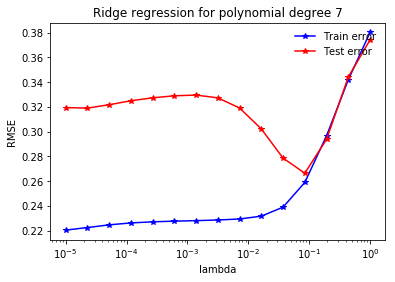

In [18]:
seed = 1
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)